## Problem 0: Getting Connected

Done.

## Problem 1: Python & Data Exploration

### 1.(a)

In [17]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value is the last column
X = iris[:,0:-1] # features are the other columns

print('The number of features:',X.shape[1])
print('The number of data points',X.shape[0])
# print(iris)


The number of features: 4
The number of data points 148


### 1.(b)

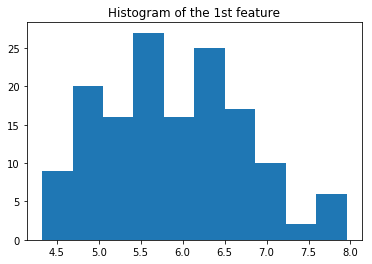

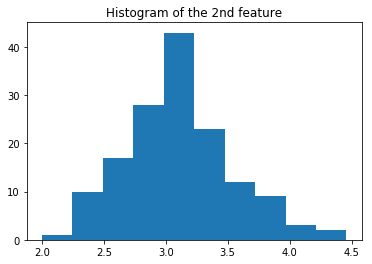

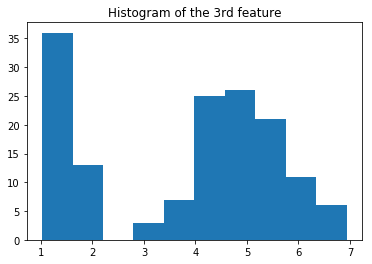

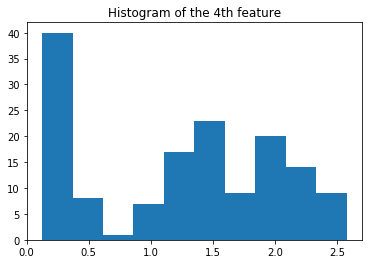

In [11]:
x1 = plt.hist(iris[:,0])
plt.title('Histogram of the 1st feature')
plt.show()

x2 = plt.hist(iris[:,1])
plt.title('Histogram of the 2nd feature')
plt.show()

x3 = plt.hist(iris[:,2])
plt.title('Histogram of the 3rd feature')
plt.show()

x4 = plt.hist(iris[:,3])
plt.title('Histogram of the 4th feature')
plt.show()

### 1.(c)

In [12]:
m1 = np.mean(iris[:,0])
v1 = np.std(iris[:,0])
print('For the 1st feature, mean =',m1,', standard deviation =',v1)

m2 = np.mean(iris[:,1])
v2 = np.std(iris[:,1])
print('For the 2nd feature, mean =',m2,', standard deviation =',v2)

m3 = np.mean(iris[:,2])
v3 = np.std(iris[:,2])
print('For the 3rd feature, mean =',m3,', standard deviation =',v3)

m4 = np.mean(iris[:,3])
v4 = np.std(iris[:,3])
print('For the 4th feature, mean =',m4,', standard deviation =',v4)

For the 1st feature, mean = 5.900103764189188 , standard deviation = 0.833402066774894
For the 2nd feature, mean = 3.098930916891892 , standard deviation = 0.43629183800107685
For the 3rd feature, mean = 3.8195548405405404 , standard deviation = 1.7540571093439352
For the 4th feature, mean = 1.2525554845945945 , standard deviation = 0.7587724570263247


### 1.(d)

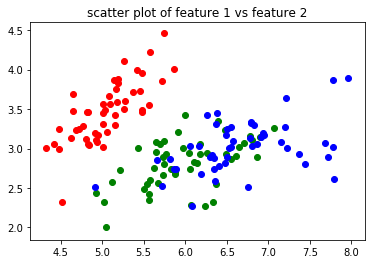

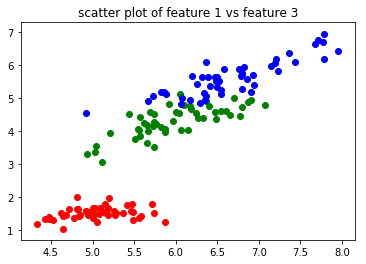

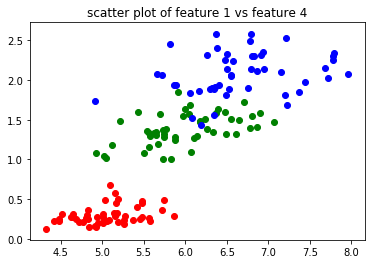

In [18]:
for i in range(1,4):    
    p0 = np.empty(shape=[0, 5])
    p1 = np.empty(shape=[0, 5])
    p2 = np.empty(shape=[0, 5])
    for data in iris:
        if data[4] == 0:
            p0 = np.vstack((p0, data))
        if data[4] == 1:
            p1 = np.vstack((p1, data))
        if data[4] == 2:
            p2 = np.vstack((p2, data))

    plt.scatter(p0[:,0], p0[:,i], c='r')
    plt.scatter(p1[:,0], p1[:,i], c='g')
    plt.scatter(p2[:,0], p2[:,i], c='b')
    plt.title('scatter plot of feature ' + str(1) + ' vs feature '+ str(int(i+1)))
    plt.show()


## Problem 2: kNN predictions

### 2.(a)

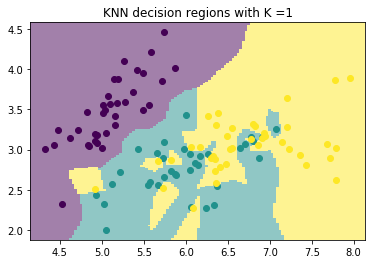

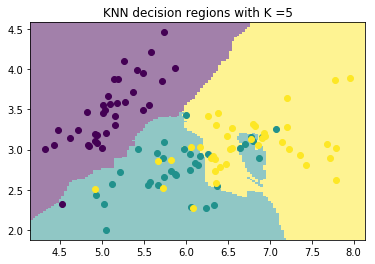

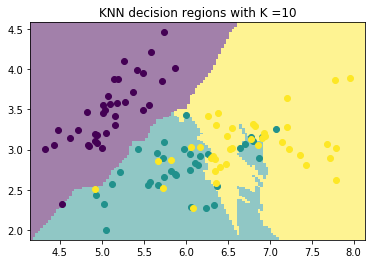

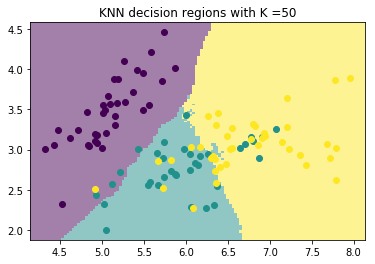

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the data
Y = iris[:,-1]
X = iris[:,0:2]
np.random.seed(111111)
X,Y = ml.shuffleData(X,Y); # shuffle data randomly

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75); # split data into 75/25 train/validation


for K in [1,5,10,50]:
    knn = ml.knn.knnClassify() # create the object and train it
    knn.train(Xtr, Ytr, int(K)) # where K is an integer, e.g. 1 for nearest neighbor prediction
    YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xva
    # Alternatively, the constructor provides a shortcut to "train":
    # knn = ml.knn.knnClassify( Xtr, Ytr, K );
    # YvaHat = predict( knn, Xva );
#     print(YvaHat)
    plt.title('KNN decision regions with K ='+ str(K))
    ml.plotClassify2D( knn, Xtr, Ytr ); # make 2D classification plot with data (Xtr,Ytr)
    plt.show()

### 2.(b)

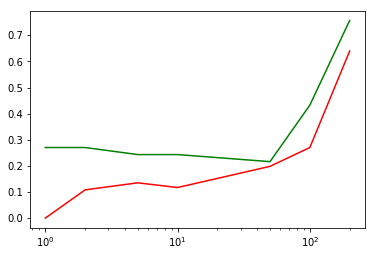

In [16]:
K=[1,2,5,10,50,100,200]
errTrain = []
errValidation = []
for i,k in enumerate(K):
    learner = ml.knn.knnClassify( Xtr, Ytr, k ) 
    
    YThat = learner.predict( Xtr )
    counter = 0.0
    for j,y in enumerate(YThat):
        if Ytr[j] != y:
            counter = counter + 1  
    errTrain.append(counter / float(len(YThat))) 
    
    Yhat = learner.predict( Xva ) 
    counter = 0.0
    for j,y in enumerate(Yhat):
        if Yva[j] != y:
            counter = counter + 1  
    errValidation.append(counter / float(len(Yhat))) 
    
plt.semilogx(K, errTrain,'r')
plt.semilogx(K, errValidation,'g') 
plt.show()

Hence, K = 50 is recommended.

## Problem 3: Naïve Bayes Classifiers

### 3.(a)

p(y=1) = 2/5.  p(y=-1) = 3/5.

p(x1=1|y=1) = 3/4.  p(x2=1|y=1) = 0.  
p(x3=1|y=1) = 3/4.  p(x4=1|y=1) = 1/2.  
p(x5=1|y=1) = 1/4.

p(x1=1|y=-1) = 1/2.  p(x2=1|y=-1) = 5/6.  
p(x3=1|y=-1) = 2/3.  p(x4=1|y=-1) = 5/6.  
p(x5=1|y=-1) = 1/3.
                                

### 3.(b)

x = (0 0 0 0 0) Ignore the normalization:

p(y=1|x1=0,x2=0,x3=0,x4=0,x5=0) 

= p(x1=0,x2=0,x3=0,x4=0,x5=0|y=1) * p(y=1)

= p(x1=0|y=1) * p(x2=0|y=1)* p(x3=0|y=1) * p(x4=0|y=1) * p(x5=0|y=1) * p(y=1)

= (1 - 3/4) * (1 - 0) * (1 - 3/4) * (1 - 1/2) * (1 - 1/4) * 2/5

= 3/320

p(y=-1|x1=0,x2=0,x3=0,x4=0,x5=0) 

= p(x1=0,x2=0,x3=0,x4=0,x5=0|y=-1) * p(y=-1) 

= p(x1=0|y=-1) * p(x2=0|y=-1)* p(x3=0|y=-1) * p(x4=0|y=-1) * p(x5=0|y=-1) * p(y=-1) 

= (1 - 1/2) * (1 - 5/6) * (1 - 2/3) * (1 - 5/6) * (1 - 1/3) * 3/5 

= 1/540 

Since p(y=-1|x1=0,x2=0,x3=0,x4=0,x5=0) < p(y=1|x1=0,x2=0,x3=0,x4=0,x5=0), we will predict y = 1 for x = (0 0 0 0 0).



x = (1 1 0 1 0) Ignore the normalization:

p(y=1|x1=1,x2=1,x3=0,x4=1,x5=0) 

= p(x1=1,x2=1,x3=0,x4=1,x5=0|y=1) * p(y=1) 

= p(x1=1|y=1) * p(x2=1|y=1)* p(x3=0|y=1) * p(x4=1|y=1) * p(x5=0|y=1) * p(y=1)

= 3/4 * 0 * (1 - 3/4) * 1/2 * (1 - 1/4) * 2/5

= 0

p(y=-1|x1=1,x2=1,x3=0,x4=1,x5=0) 

= p(x1=1,x2=1,x3=0,x4=1,x5=0|y=-1) * p(y=-1) 

= p(x1=1|y=-1) * p(x2=1|y=-1)* p(x3=0|y=-1) * p(x4=1|y=-1) * p(x5=0|y=-1) * p(y=-1)

= 1/2 * 5/6 * (1 - 2/3) * 5/6 * (1 - 1/3) * 3/5

= 5/108

Since p(y=-1|x1=0,x2=0,x3=0,x4=0,x5=0) > p(y=1|x1=0,x2=0,x3=0,x4=0,x5=0), we will predict y = -1 for x = (1 1 0 1 0).

### 3.(c)

Since p(y=1|x1=1,x2=1,x3=0,x4=1,x5=0) = 0. 

The posterior probability y = +1 given the observation x = (1 1 0 1 0) is 0.

### 3.(d)

Since a full joint distribution contains a probability for every possible combination of variable values, and there are 5 features for this problem. Hence the full joint distribution is specified by 2^5 = 32 probabilities. 

However, by exploiting conditional independence properties, the bayesian network only requires 5 + 1 = 6 (probability p(xi) & p(y))probabilities, which are more compact and feasible.

### 3.(e)

Because the author is unknown (lose feature x1), we should use p(x2|y), p(x3|y), p(x4|y), p(x5|y) and p(y) to re-train the model. 

Ignore the normalization: 
p(y|x2,x3,x4,x5) 
= p(x2,x3,x4,x5|y) * p(y) 
= p(x2|y)* p(x3|y) * p(x4|y) * p(x5|y) * p(y).